# **Description**:

This script was developed to replicate Figure 6 on the manuscript "Relationship Between Environmental Values and the Evaluation of Watershed Conservation Plans that Benefit the Community Versus the Individual." It is designed to be executed in R.

Use R Colab version for replication in a cloud-based environment using the R kernel.

To prepare the final Figure for presentation in the manuscript, the resulting values were formatted in Excel.

## Install libraries

Installing libraries may take some minutes

In [1]:
# # Install and load necessary libraries
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [13]:
library(ggplot2)
library(tidyr)

In [ ]:
# Set the working directory
setwd("D:/work/research_o/paper_02/replica")

## **Part 1: Get PPM values**

In [7]:
# ================= Part 1: Get PPM values  ====================== #
# ------------ 1.1  Read and transpose the data set
df_t <- read.csv("Rating_of_participants_to_the_suggested_plans.csv") %>%
  select(-Particip) %>%
  tibble::column_to_rownames("pid") %>%
  t() %>%
  as.data.frame() %>%
  tibble::rownames_to_column("pid")

colnames(df_t) <- c("pid", paste0("p", seq_len(ncol(df_t) - 1))) # Rename columns: "pid", "p1", "p2", ...
df_t <- df_t %>% mutate(ID = row_number(), .before = 1) # Add sequential ID column
#print(head(df_t)) # Preview result


# ------------ 1.2 Compute PPM values
rating_data <- df_t
#print(rating_data)

# Define the range of columns to process
start_col_num <- 3  # Column 'p1' is at index 3
end_col_num <- 79   # Column 'p24' is at index 26
column_indices <- start_col_num:end_col_num

# Set an empty vector to store average PPM values (slopes)
average_PPMs_vector <- c()
chunk_size <- 4

# Loop through each End-User
for (col_index in column_indices) {
  slopes <- c()
  # Loop through the data in chunks of 4 rows for the current test-user
  for (i in 1:(nrow(rating_data)/chunk_size)) {
    start_row <- (i - 1) * chunk_size + 1
    end_row <- i * chunk_size
    chunk_data <- rating_data[start_row:end_row, ]

    # Compute the PPM value using linear regression approach
    model <- lm(chunk_data[[col_index]] ~ ID, data = chunk_data)
    slopes <- c(slopes, -coef(model)[2])
  }
  average_PPM_for_col <- mean(slopes)
  average_PPMs_vector <- c(average_PPMs_vector, average_PPM_for_col)
}

# -------------- 1.3 Print the final vector of average PPM values
cat("Average PPM values for all participants:\n")
cat(paste(round(average_PPMs_vector, 4), collapse = ", "))
# ==============================================================================

Average PPMs for all participants:
0.44, 0.56, 0.64, 0.92, 0.48, 0.5, 0.96, 1.14, 0.38, 1.58, 1.04, 1, 0.8, 1, 1.32, 1.22, 0.8, 0.82, 0.6, 0.98, 0.84, 0.6, 0.64, 0.28, 0.64, 0.82, 0.08, 0.06, 1.32, 0.48, 0.32, 0.22, 0.38, 1.14, 1.12, 0.9, 0.32, 0.5, 0.88, 0.48, 0.38, 0.66, 0.7, 0.16, 0.1, 0.72, 0.56, 1.02, 0.7, 0.8, 0.44, 0.72, 0, 0.28, 0.32, 0.62, 0.38, 0.68, 0.8, 0.48, 0.48, 1.14, 0.38, 0.36, 0.44, 0.7, 1.1, 0.5, 0.96, 0.66, 0.84, 0.5, 0.66, 1.18, 0.7, 1.02, 0.22

## **Part 2: Get average E-PVQ values**

In [10]:
# ============== Part 2: Get average E-PVQ values ============== #

# ------------ 2.1  Read and transpose the data set
EPVQ_data <- read.csv("EPVQ_score_data.csv") %>%
  select(-Particip) %>%
  tibble::column_to_rownames("pid") %>%
  t() %>%
  as.data.frame() %>%
  tibble::rownames_to_column("pid")

colnames(EPVQ_data) <- c("pid", paste0("p", seq_len(ncol(EPVQ_data) - 1))) # Rename columns: "pid", "p1", "p2", ...
EPVQ_data <- EPVQ_data %>% mutate(ID = row_number(), .before = 1) # Add sequential ID column
#print(head(EPVQ_data)) # Preview result

# ------------ 2.2 Compute E-PVQ average values
row_chunks <- list(
  1:4,    # Biospheric
  5:9,    # Altruistic
  10:12,  # Hedonic
  13:17   # Egoistic
)

# Define the range of columns to process (End-users: p1-p24; Test-users: p25-p77)
start_col_name <- "p1" # "p25" #
end_col_name <- "p77" # "p77" #
column_indices <- which(names(EPVQ_data) == start_col_name):which(names(EPVQ_data) == end_col_name)
column_names <- names(EPVQ_data)[column_indices]

# Initialize a data frame to store the average values
average_values_matrix <- matrix(NA, nrow = length(row_chunks), ncol = length(column_names))
average_values_df <- as.data.frame(average_values_matrix)
names(average_values_df) <- column_names

# Loop through each column from p1 to p24
for (col_index in 1:length(column_names)) {
  current_col_name <- column_names[col_index]

  # Loop through each Human-value
  for (chunk_index in 1:length(row_chunks)) {
    chunk_rows <- row_chunks[[chunk_index]]
    chunk_data <- EPVQ_data[chunk_rows, current_col_name]
    average_value <- mean(chunk_data)
    average_values_df[chunk_index, current_col_name] <- average_value
  }
}

# -------------- 2.3 Print average E-PVQ values
cat("Average E-PVQ values for all participants:\n")
print(round(average_values_df, 2))
# ==============================================================================

Average E-PVQ values for all participants:
    p1   p2   p3   p4   p5   p6   p7   p8   p9  p10  p11  p12  p13  p14 p15 p16
1 5.25 4.75 6.75 6.25 6.50 5.75 6.00 5.75 6.25 5.50 6.50 5.50 6.25 6.75 4.5 3.5
2 6.80 7.00 6.60 6.60 7.00 6.40 6.60 6.40 6.80 5.20 6.80 5.60 6.80 7.00 5.2 6.0
3 6.00 6.33 6.67 5.00 6.33 6.33 5.67 5.33 6.00 4.67 6.33 4.67 4.00 7.00 5.0 7.0
4 3.00 2.40 5.20 4.40 3.40 4.00 5.80 5.20 2.60 4.00 5.80 4.40 3.80 6.60 5.0 3.6
   p17 p18  p19  p20  p21  p22  p23  p24  p25  p26  p27  p28  p29  p30  p31 p32
1 4.25 4.5 6.25 5.25 6.25 5.75 6.25 7.00 6.75 5.75 6.00 7.00 5.50 4.25 5.50 7.0
2 6.60 7.0 7.00 5.60 6.60 7.00 6.60 7.00 6.40 6.60 6.60 6.80 4.80 5.80 6.20 7.0
3 7.00 6.0 7.00 4.67 6.33 6.67 5.00 5.67 6.33 6.33 6.67 5.33 6.33 6.00 5.33 7.0
4 3.40 2.8 3.00 4.40 2.60 2.20 4.80 3.40 3.20 6.20 4.20 1.80 4.60 3.20 2.40 3.6
   p33 p34  p35  p36  p37 p38 p39  p40  p41 p42  p43  p44 p45  p46 p47 p48  p49
1 5.75 4.0 3.75 5.25 4.50 6.5 5.0 4.50 7.00 5.5 7.00 5.75 7.0 6.75 6.5 6.5 6.

## **Part 3: Combine and format the final dataframe**

In [12]:
# ============ Part 3: Combine and format the final dataframe ============ #

# Transpose the average_values_df and set the row names
combined_df <- t(average_values_df)
colnames(combined_df) <- c("Bio", "Alt", "Hed", "Ego")
combined_df <- as.data.frame(combined_df)

# Add the PPM values as a new column
combined_df$PPM <- average_PPMs_vector
print(head(combined_df))

# Save the final dataframe to a CSV file
#write.csv(combined_df, "combined_results.csv", row.names = TRUE)
# ==============================================================================

    Bio Alt      Hed Ego  PPM
p1 5.25 6.8 6.000000 3.0 0.44
p2 4.75 7.0 6.333333 2.4 0.56
p3 6.75 6.6 6.666667 5.2 0.64
p4 6.25 6.6 5.000000 4.4 0.92
p5 6.50 7.0 6.333333 3.4 0.48
p6 5.75 6.4 6.333333 4.0 0.50


## **Part 4: Plot E-PVQ Scores vs. PPM (Fig 6)**

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


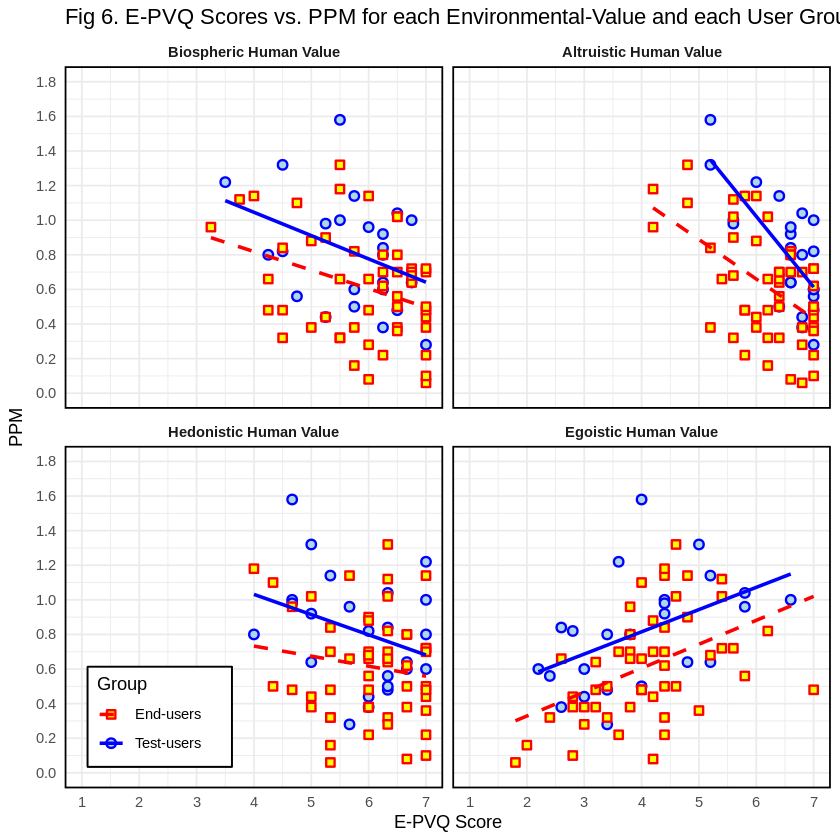

In [14]:
# ================ Part 4: Plot E-PVQ Scores vs. PPM (Fig 6)================= #
# Load necessary libraries
#library(ggplot2)
#library(tidyr) # For data transformation (pivot_longer)

df <- combined_df
df$Group <- c(rep("Test-users", 24), rep("End-users", 53))

# 1. Transform the data to a long format
# We'll gather the 'Bio', 'Alt', 'Hed', 'Ego' columns into two new columns:
# 'Variable' (which holds the original column name) and 'Value' (which holds the data)
df_long <- df %>%
  pivot_longer(
    cols = c(Bio, Alt, Hed, Ego), # Columns to pivot
    names_to = "Variable",       # New column for original column names
    values_to = "Value"          # New column for the values
  )

# Optional: Reorder the facets if you want a specific order (e.g., Bio, Alt, Hed, Ego)
df_long$Variable <- factor(df_long$Variable, levels = c("Bio", "Alt", "Hed", "Ego"))

# Define custom titles for each facet (optional, but makes plots clearer)
facet_titles <- c(
  Bio = "Biospheric Human Value",
  Alt = "Altruistic Human Value",
  Hed = "Hedonistic Human Value",
  Ego = "Egoistic Human Value"
)

# 2. Create the faceted plot using ggplot2
ggplot(df_long, aes(x = Value, y = PPM, color = Group, shape = Group)) +
  # Add scatter plot points for both groups
  geom_point(aes(fill = Group), size = 2, stroke = 1) + # Increased marker size to 4
  # Set the specific colors and shapes for each group
  scale_color_manual(values = c("Test-users" = "blue", "End-users" = "red")) +
  scale_fill_manual(values = c("Test-users" = "lightblue", "End-users" = "yellow")) +
  scale_shape_manual(values = c("Test-users" = 21, "End-users" = 22)) +
  # Add linear regression trend lines for each group within each facet
  geom_smooth(method = "lm", se = FALSE, aes(group = Group, color = Group, linetype = Group)) +
  scale_linetype_manual(values = c("Test-users" = "solid", "End-users" = "dashed")) +
  # Set plot titles and labels
  labs(title = "Fig 6. E-PVQ Scores vs. PPM for each Environmental-Value and each User Group ", # General title for the entire plot
       x = "E-PVQ Score", # Generic x-axis label, specific labels will come from facets
       y = "PPM",
       color = "Group",
       shape = "Group",
       fill = "Group") +
  # Set x-axis limits and breaks for all facets
  scale_x_continuous(limits = c(1, 7), breaks = seq(1, 7, by = 1.0)) +
  # Set y-axis limits and breaks for all facets
  scale_y_continuous(limits = c(0, 1.8), breaks = seq(0, 1.8, by = 0.2)) +
  theme_minimal() +
  # Position the legend
  theme(legend.position = c(0.03, 0.03),
        legend.justification = c("left", "bottom"),
        legend.background = element_rect(fill = "white", color = "black", size = 0.5, linetype = "solid"),
        legend.box.background = element_rect(fill = "white", color = "black", size = 0.5, linetype = "solid"),
        strip.text = element_text(face = "bold"), # Make facet titles bold
        panel.border = element_rect(colour = "black", fill = NA, size = 1) # Add a frame border to each subplot
  ) +
  # Create subplots based on the 'Variable' column, arranged in 2 columns
  facet_wrap(~ Variable, ncol = 2, labeller = as_labeller(facet_titles))
# ==============================================================================

## Optional

In [15]:
p <- ggplot(df_long, aes(x = Value, y = PPM, color = Group, shape = Group)) +
  # Add scatter plot points for both groups
  geom_point(aes(fill = Group), size = 2, stroke = 1) + # Increased marker size to 4
  # Set the specific colors and shapes for each group
  scale_color_manual(values = c("Test-users" = "blue", "End-users" = "red")) +
  scale_fill_manual(values = c("Test-users" = "lightblue", "End-users" = "yellow")) +
  scale_shape_manual(values = c("Test-users" = 21, "End-users" = 22)) +
  # Add linear regression trend lines for each group within each facet
  geom_smooth(method = "lm", se = FALSE, aes(group = Group, color = Group, linetype = Group)) +
  scale_linetype_manual(values = c("Test-users" = "solid", "End-users" = "dashed")) +
  # Set plot titles and labels
  labs(title = "Fig 6. E-PVQ Scores vs. PPM for each Environmental-Value and each User Group ", # General title for the entire plot
       x = "E-PVQ Score", # Generic x-axis label, specific labels will come from facets
       y = "PPM",
       color = "Group",
       shape = "Group",
       fill = "Group") +
  # Set x-axis limits and breaks for all facets
  scale_x_continuous(limits = c(1, 7), breaks = seq(1, 7, by = 1.0)) +
  # Set y-axis limits and breaks for all facets
  scale_y_continuous(limits = c(0, 1.8), breaks = seq(0, 1.8, by = 0.2)) +
  theme_minimal() +
  # Position the legend
  theme(legend.position = c(0.03, 0.03),
        legend.justification = c("left", "bottom"),
        legend.background = element_rect(fill = "white", color = "black", size = 0.5, linetype = "solid"),
        legend.box.background = element_rect(fill = "white", color = "black", size = 0.5, linetype = "solid"),
        strip.text = element_text(face = "bold"), # Make facet titles bold
        panel.border = element_rect(colour = "black", fill = NA, size = 1) # Add a frame border to each subplot
  ) +
  # Create subplots based on the 'Variable' column, arranged in 2 columns
  facet_wrap(~ Variable, ncol = 2, labeller = as_labeller(facet_titles))

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


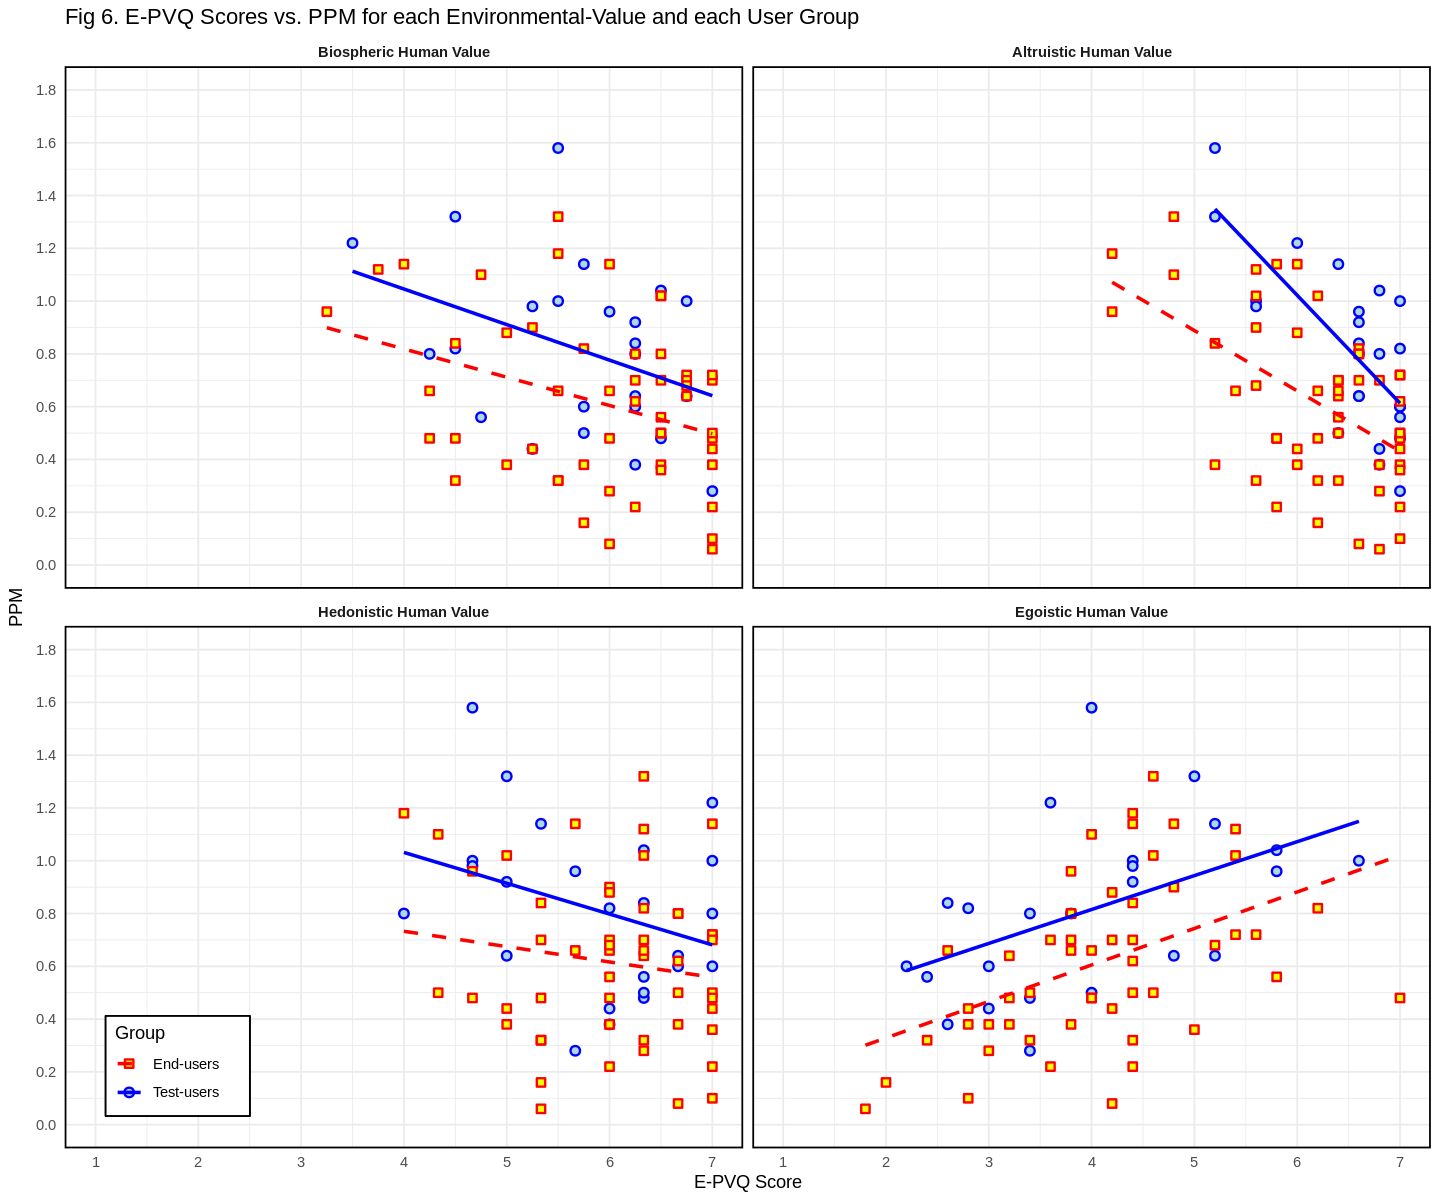

In [18]:
options(repr.plot.width = 12, repr.plot.height = 10)
print(p)